In [3]:
import pandas as pd

In [4]:
mind_news = pd.read_table('data/MINDsmall_train/news.tsv',header=None,
                          names=['news_id','news_type','news_subtype','title','text','url','labels1','labels2'])

In [5]:
len(mind_news)

51282

In [3]:
#mind_news.colums.rename( ['news_id','news_type','news_subtype','title','text','url','labels1','labels2'])

In [6]:
mind_news.head()

,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [7]:
mind_news = mind_news.loc[mind_news["news_type"].isin(['news','finance'])]

In [8]:
len(mind_news)

18881

In [12]:
mind_interacts = pd.read_table('data/MINDsmall_train/behaviors.tsv',header=None,names=["impression_id","user_id","time","history","impressions"])

In [13]:
mind_interacts.head()

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N55189 N42782 N34694 N45794 N18445 N63302 N104...,N55689-1 N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N35656 N43353 N8129...,N20678-0 N39317-0 N58114-0 N20495-0 N42977-0 N...
2,3,U73700,11/14/2019 7:01:48 AM,N10732 N25792 N7563 N21087 N41087 N5445 N60384...,N50014-0 N23877-0 N35389-0 N49712-0 N16844-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N45729 N2203 N871 N53880 N41375 N43142 N33013 ...,N35729-0 N33632-0 N49685-1 N27581-0
4,5,U8125,11/12/2019 4:11:21 PM,N10078 N56514 N14904 N33740,N39985-0 N36050-0 N16096-0 N8400-1 N22407-0 N6...


<Axes: >

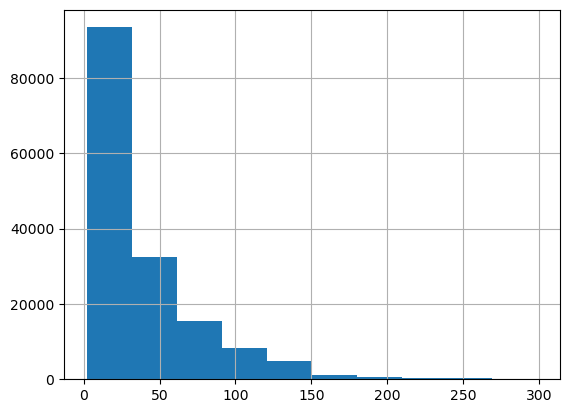

In [14]:
mind_interacts['impressions'].str.split().apply(len).hist()

In [15]:
len(mind_interacts)

156965

In [9]:
#mind_interacts['impressions'].str.split().explode().str.strip("-0").str.strip("-1").isin(mind_news["news_id"]).sum()

In [10]:
mind_interacts['user_id'].nunique()

50000

In [11]:
mind_interacts['history'] = mind_interacts['history'].str.split()

In [12]:
mind_interacts['impressions'] = mind_interacts['impressions'].str.split()

In [13]:
#mind_interacts['impressions'].apply(lambda x: [y.split("-")[0] for y in x])

In [14]:
#mind_interacts['impressions'] .apply(lambda x: [y.split("-")[1] for y in x])

In [15]:
#mind_interacts['history'].explode().isin(mind_news['news_id'].unique())

In [16]:
#checks if belongs to news

In [17]:
#mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(list)

In [18]:
mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum).sum()

/tmp/ipykernel_7197/3028116728.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum).sum()


1995560

In [19]:
#(mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum) >0).sum()

In [20]:
#mind_interacts['history'].explode().loc[mind_interacts['history'].explode().isin(mind_news['news_id'].unique())].reset_index().groupby('index')["history"].apply(list)

In [21]:

idxs_articles_of_the_type = mind_interacts['history'].explode().isin(mind_news['news_id'].unique())
mind_interacts['filtered_history'] = mind_interacts['history'].explode().loc[idxs_articles_of_the_type].reset_index().groupby('index')["history"].apply(list)

<Axes: >

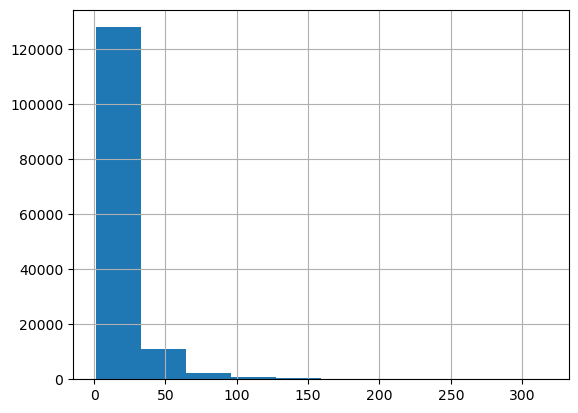

In [22]:
mind_interacts.dropna(axis=0,subset=['filtered_history'])['filtered_history'].apply(len).hist()

In [23]:
(mind_interacts.dropna(axis=0,subset=['filtered_history'])['filtered_history'].apply(len)>0).sum()

142904

In [24]:
mind_interacts.dropna(axis=0,subset=['filtered_history'],inplace=True)

In [25]:
train_mind = mind_interacts.explode('filtered_history').copy()

In [26]:
mind_news.head()

,news_id,news_type,news_subtype,title,text,url,labels1,labels2
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
7,N59295,news,newsworld,Chile: Three die in supermarket fire amid prot...,Three people have died in a supermarket fire a...,https://assets.msn.com/labs/mind/AAJ43pw.html,"[{""Label"": ""Chile"", ""Type"": ""G"", ""WikidataId"":...","[{""Label"": ""Santiago"", ""Type"": ""G"", ""WikidataI..."
9,N39237,news,newsscienceandtechnology,"How to report weather-related closings, delays","When there are active closings, view them here...",https://assets.msn.com/labs/mind/AAlErhA.html,[],"[{""Label"": ""WXII-TV"", ""Type"": ""M"", ""WikidataId..."
20,N9786,news,newspolitics,Elijah Cummings to lie in state at US Capitol ...,"Cummings, a Democrat whose district included s...",https://assets.msn.com/labs/mind/AAJgNxm.html,"[{""Label"": ""Elijah Cummings"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Elijah Cummings"", ""Type"": ""P"", ""Wi..."
23,N42474,news,newsbusiness,Trump's Trustbusters Bring Microsoft Lessons t...,DOJ's Makan Delrahim and the FTC's Joe Simons ...,https://assets.msn.com/labs/mind/AACI1SK.html,"[{""Label"": ""Big Four tech companies"", ""Type"": ...","[{""Label"": ""Makan Delrahim"", ""Type"": ""P"", ""Wik..."


In [27]:
train_mind = train_mind.merge(mind_news,left_on="filtered_history",right_on="news_id")

In [28]:
train_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N45794,N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,https://assets.msn.com/labs/mind/AAJcQKF.html,[],"[{""Label"": ""Miami International Airport"", ""Typ..."
1,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N19347,N19347,news,newspolitics,Former US Senator Kay Hagan dead at 66,"Former U.S. Sen. Kay Hagan, a one-time Capitol...",https://assets.msn.com/labs/mind/AAJtpQT.html,"[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata..."
2,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N31801,N31801,news,newspolitics,Joe Biden reportedly denied Communion at a Sou...,Joe Biden has a complicated history with the C...,https://assets.msn.com/labs/mind/AAJwml6.html,"[{""Label"": ""Joe Biden"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Catholic Church"", ""Type"": ""O"", ""Wi..."
3,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N31739,N31739,news,newscrime,"'Habitual stowaway' arrested again at O'Hare, ...",A woman arrested at O'Hare International Airpo...,https://assets.msn.com/labs/mind/AAIGE9J.html,"[{""Label"": ""O'Hare, Chicago"", ""Type"": ""G"", ""Wi...","[{""Label"": ""Chicago Police Department"", ""Type""..."
4,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N6072,N6072,news,newsus,Search resumes for worker missing in New Orlea...,Rescuers resumed searching Sunday for a worker...,https://assets.msn.com/labs/mind/AAIHMJH.html,[],"[{""Label"": ""New Orleans"", ""Type"": ""G"", ""Wikida..."


In [29]:
mind_interacts['impression_news_id'] = mind_interacts['impressions'].apply(lambda x: [y.split("-")[0] for y in x])

In [30]:
mind_interacts['impression_news_label'] = mind_interacts['impressions'] .apply(lambda x: [y.split("-")[1] for y in x])

In [31]:
test_mind = mind_interacts.explode(['impression_news_id','impression_news_label']).copy()

In [32]:
test_mind = test_mind.loc[test_mind['impression_news_id'].isin(mind_news["news_id"].unique())]

In [33]:
test_mind = test_mind.merge(mind_news,left_on="impression_news_id",right_on="news_id")

In [34]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]","[N45794, N19347, N31801]",N35729,0,N35729,news,newsus,Porsche launches into second story of New Jers...,The Porsche went airborne off a median in Toms...,https://assets.msn.com/labs/mind/BBWyjM9.html,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId..."
1,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...","[N31739, N6072, N63045, N23979, N43353, N8129,...",N39317,0,N39317,news,newspolitics,"Senior Trump official embellished résumé, had ...",State Dept. official Mina Chang claimed to be ...,https://assets.msn.com/labs/mind/BBWEmIj.html,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ..."
2,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...","[N31739, N6072, N63045, N23979, N43353, N8129,...",N20495,0,N20495,news,newscrime,Mother of missing Florida girl charged; human ...,Police searching for a 5-year-old Florida girl...,https://assets.msn.com/labs/mind/BBWEIZi.html,"[{""Label"": ""Florida"", ""Type"": ""G"", ""WikidataId...","[{""Label"": ""Alabama"", ""Type"": ""G"", ""WikidataId..."
3,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...","[N31739, N6072, N63045, N23979, N43353, N8129,...",N42977,0,N42977,news,newsus,'It's not over': Sarah Palin says she is fight...,Former Alaska Gov. Sarah Palin said she learne...,https://assets.msn.com/labs/mind/BBWF2FT.html,"[{""Label"": ""Sarah Palin"", ""Type"": ""P"", ""Wikida...","[{""Label"": ""Sarah Palin"", ""Type"": ""P"", ""Wikida..."
4,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...","[N31739, N6072, N63045, N23979, N43353, N8129,...",N22407,0,N22407,finance,markets,Wealthy investors are bracing for a sharp stoc...,More than half of the world's wealthiest inves...,https://assets.msn.com/labs/mind/BBWEQm9.html,[],"[{""Label"": ""UBS"", ""Type"": ""O"", ""WikidataId"": ""..."


In [35]:
len(test_mind)

1981827

In [36]:
test_mind = test_mind.explode(['filtered_history']).merge(mind_news,left_on="filtered_history",right_on="news_id")

In [37]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id_x,news_type_x,...,labels1_x,labels2_x,news_id_y,news_type_y,news_subtype_y,title_y,text_y,url_y,labels1_y,labels2_y
0,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N45794,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,https://assets.msn.com/labs/mind/AAJcQKF.html,[],"[{""Label"": ""Miami International Airport"", ""Typ..."
1,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N19347,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N19347,news,newspolitics,Former US Senator Kay Hagan dead at 66,"Former U.S. Sen. Kay Hagan, a one-time Capitol...",https://assets.msn.com/labs/mind/AAJtpQT.html,"[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata..."
2,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N31801,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N31801,news,newspolitics,Joe Biden reportedly denied Communion at a Sou...,Joe Biden has a complicated history with the C...,https://assets.msn.com/labs/mind/AAJwml6.html,"[{""Label"": ""Joe Biden"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Catholic Church"", ""Type"": ""O"", ""Wi..."
3,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N31739,N39317,0,N39317,news,...,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ...",N31739,news,newscrime,"'Habitual stowaway' arrested again at O'Hare, ...",A woman arrested at O'Hare International Airpo...,https://assets.msn.com/labs/mind/AAIGE9J.html,"[{""Label"": ""O'Hare, Chicago"", ""Type"": ""G"", ""Wi...","[{""Label"": ""Chicago Police Department"", ""Type""..."
4,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N6072,N39317,0,N39317,news,...,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ...",N6072,news,newsus,Search resumes for worker missing in New Orlea...,Rescuers resumed searching Sunday for a worker...,https://assets.msn.com/labs/mind/AAIHMJH.html,[],"[{""Label"": ""New Orleans"", ""Type"": ""G"", ""Wikida..."


In [38]:
res = test_mind.groupby(['impression_id','user_id','time','news_id_x'])[['text_x','title_x','text_y','title_y','news_type_x','impression_news_label']].aggregate(list)

In [39]:
res.head()

text_x  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [The Porsche went airborne off a median in Tom...   
2             U91836  11/12/2019 6:11:30 PM N17059     [Dean Foods blamed a decadeslong drop in milk ...   
                                            N20495     [Police searching for a 5-year-old Florida gir...   
                                            N22407     [More than half of the world's wealthiest inve...   
                                            N39317     [State Dept. official Mina Chang claimed to be...   

                                                                                                 title_x  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [Porsche launches into second story of New Jer...   
2             U91836  11/12/2019 6:11:30 PM N17059     [No. 1 milk company declares bankruptcy amid d...   
                                            N20495     [Mother of missing Florida girl charged; human...   
                                            N22407     [Wealthy investors are bracing for a sharp sto...   
                                            N39317     [Senior Trump official embellished résumé, had...   

                                                                                                  text_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [Four American Airlines flight attendants were...   
2             U91836  11/12/2019 6:11:30 PM N17059     [A woman arrested at O'Hare International Airp...   
                                            N20495     [A woman arrested at O'Hare International Airp...   
                                            N22407     [A woman arrested at O'Hare International Airp...   
                                            N39317     [A woman arrested at O'Hare International Airp...   

                                                                                                 title_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [Four flight attendants were arrested in Miami...   
2             U91836  11/12/2019 6:11:30 PM N17059     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N20495     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N22407     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N39317     ['Habitual stowaway' arrested again at O'Hare,...   

                                                                                             news_type_x  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                                    [news, news, news]   
2             U91836  11/12/2019 6:11:30 PM N17059     [finance, finance, finance, finance, finance, ...   
                                            N20495     [news, news, news, news, news, news, news, new...   
                                            N22407     [finance, finance, finance, finance, finance, ...   
                                            N39317     [news, news, news, news, news, news, news, new...   

                                                                                   impression_news_label  
impression_id user_id time                  news_id_x                                                     
1             U13740  11/11/2019 9:05:58 AM N35729                                             [0, 

In [40]:
len(set(res['text_x'].iloc[0]))

1

In [41]:
len(res['text_x'].iloc[0])

3

In [42]:
res['text_x'] = res['text_x'].apply(lambda x: set(x).pop())
res['title_x'] = res['title_x'].apply(lambda x: set(x).pop())
res['impression_news_label'] = res['impression_news_label'].apply(lambda x: set(x).pop())
res['news_type_x'] = res['news_type_x'].apply(lambda x: set(x))

In [43]:
res.head()

text_x  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     The Porsche went airborne off a median in Toms...   
2             U91836  11/12/2019 6:11:30 PM N17059     Dean Foods blamed a decadeslong drop in milk c...   
                                            N20495     Police searching for a 5-year-old Florida girl...   
                                            N22407     More than half of the world's wealthiest inves...   
                                            N39317     State Dept. official Mina Chang claimed to be ...   

                                                                                                 title_x  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     Porsche launches into second story of New Jers...   
2             U91836  11/12/2019 6:11:30 PM N17059     No. 1 milk company declares bankruptcy amid dr...   
                                            N20495     Mother of missing Florida girl charged; human ...   
                                            N22407     Wealthy investors are bracing for a sharp stoc...   
                                            N39317     Senior Trump official embellished résumé, had ...   

                                                                                                  text_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [Four American Airlines flight attendants were...   
2             U91836  11/12/2019 6:11:30 PM N17059     [A woman arrested at O'Hare International Airp...   
                                            N20495     [A woman arrested at O'Hare International Airp...   
                                            N22407     [A woman arrested at O'Hare International Airp...   
                                            N39317     [A woman arrested at O'Hare International Airp...   

                                                                                                 title_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729     [Four flight attendants were arrested in Miami...   
2             U91836  11/12/2019 6:11:30 PM N17059     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N20495     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N22407     ['Habitual stowaway' arrested again at O'Hare,...   
                                            N39317     ['Habitual stowaway' arrested again at O'Hare,...   

                                                      news_type_x  \
impression_id user_id time                  news_id_x               
1             U13740  11/11/2019 9:05:58 AM N35729         {news}   
2             U91836  11/12/2019 6:11:30 PM N17059      {finance}   
                                            N20495         {news}   
                                            N22407      {finance}   
                                            N39317         {news}   

                                                      impression_news_label  
impression_id user_id time                  news_id_x                        
1             U13740  11/11/2019 9:05:58 AM N35729                        0  
2             U91836  11/12/2019 6:11:30 PM N17059                        1  
                                            N20495                        0  
                                            N22407                        0  
                                            N39317                        0

In [44]:
res = res.rename({'text_x':'text_candidate','title_x':'title_candidate','text_y':'text_history','title_y':'title_history','news_type_x':'candidate_news_type'},axis=1)

In [ ]:
res.to_pickle('data/mind_preprocessed_history_and_candidate_v1.pkl')

In [45]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id_x,news_type_x,...,labels1_x,labels2_x,news_id_y,news_type_y,news_subtype_y,title_y,text_y,url_y,labels1_y,labels2_y
0,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N45794,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N45794,news,newscrime,Four flight attendants were arrested in Miami'...,Four American Airlines flight attendants were ...,https://assets.msn.com/labs/mind/AAJcQKF.html,[],"[{""Label"": ""Miami International Airport"", ""Typ..."
1,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N19347,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N19347,news,newspolitics,Former US Senator Kay Hagan dead at 66,"Former U.S. Sen. Kay Hagan, a one-time Capitol...",https://assets.msn.com/labs/mind/AAJtpQT.html,"[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Kay Hagan"", ""Type"": ""P"", ""Wikidata..."
2,1,U13740,11/11/2019 9:05:58 AM,"[N55189, N42782, N34694, N45794, N18445, N6330...","[N55689-1, N35729-0]",N31801,N35729,0,N35729,news,...,"[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...","[{""Label"": ""Porsche"", ""Type"": ""O"", ""WikidataId...",N31801,news,newspolitics,Joe Biden reportedly denied Communion at a Sou...,Joe Biden has a complicated history with the C...,https://assets.msn.com/labs/mind/AAJwml6.html,"[{""Label"": ""Joe Biden"", ""Type"": ""P"", ""Wikidata...","[{""Label"": ""Catholic Church"", ""Type"": ""O"", ""Wi..."
3,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N31739,N39317,0,N39317,news,...,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ...",N31739,news,newscrime,"'Habitual stowaway' arrested again at O'Hare, ...",A woman arrested at O'Hare International Airpo...,https://assets.msn.com/labs/mind/AAIGE9J.html,"[{""Label"": ""O'Hare, Chicago"", ""Type"": ""G"", ""Wi...","[{""Label"": ""Chicago Police Department"", ""Type""..."
4,2,U91836,11/12/2019 6:11:30 PM,"[N31739, N6072, N63045, N23979, N35656, N43353...","[N20678-0, N39317-0, N58114-0, N20495-0, N4297...",N6072,N39317,0,N39317,news,...,"[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...","[{""Label"": ""Harvard Business School"", ""Type"": ...",N6072,news,newsus,Search resumes for worker missing in New Orlea...,Rescuers resumed searching Sunday for a worker...,https://assets.msn.com/labs/mind/AAIHMJH.html,[],"[{""Label"": ""New Orleans"", ""Type"": ""G"", ""Wikida..."


In [46]:
test_mind.columns

Index(['impression_id', 'user_id', 'time', 'history', 'impressions',
       'filtered_history', 'impression_news_id', 'impression_news_label',
       'news_id_x', 'news_type_x', 'news_subtype_x', 'title_x', 'text_x',
       'url_x', 'labels1_x', 'labels2_x', 'news_id_y', 'news_type_y',
       'news_subtype_y', 'title_y', 'text_y', 'url_y', 'labels1_y',
       'labels2_y'],
      dtype='object')

In [47]:
res2 = test_mind.groupby(['impression_id','user_id','time','news_id_x'])[['news_id_y','impression_news_id','impression_news_label']].aggregate(list)

In [48]:
res2.head()

news_id_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                              [N45794, N19347, N31801]   
2             U91836  11/12/2019 6:11:30 PM N17059     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N20495     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N22407     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N39317     [N31739, N6072, N63045, N23979, N43353, N8129,...   

                                                                                      impression_news_id  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                              [N35729, N35729, N35729]   
2             U91836  11/12/2019 6:11:30 PM N17059     [N17059, N17059, N17059, N17059, N17059, N1705...   
                                            N20495     [N20495, N20495, N20495, N20495, N20495, N2049...   
                                            N22407     [N22407, N22407, N22407, N22407, N22407, N2240...   
                                            N39317     [N39317, N39317, N39317, N39317, N39317, N3931...   

                                                                                   impression_news_label  
impression_id user_id time                  news_id_x                                                     
1             U13740  11/11/2019 9:05:58 AM N35729                                             [0, 0, 0]  
2             U91836  11/12/2019 6:11:30 PM N17059     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
                                            N20495     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
                                            N22407     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
                                            N39317     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [49]:
res2.head()

news_id_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                              [N45794, N19347, N31801]   
2             U91836  11/12/2019 6:11:30 PM N17059     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N20495     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N22407     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N39317     [N31739, N6072, N63045, N23979, N43353, N8129,...   

                                                                                      impression_news_id  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                              [N35729, N35729, N35729]   
2             U91836  11/12/2019 6:11:30 PM N17059     [N17059, N17059, N17059, N17059, N17059, N1705...   
                                            N20495     [N20495, N20495, N20495, N20495, N20495, N2049...   
                                            N22407     [N22407, N22407, N22407, N22407, N22407, N2240...   
                                            N39317     [N39317, N39317, N39317, N39317, N39317, N3931...   

                                                                                   impression_news_label  
impression_id user_id time                  news_id_x                                                     
1             U13740  11/11/2019 9:05:58 AM N35729                                             [0, 0, 0]  
2             U91836  11/12/2019 6:11:30 PM N17059     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...  
                                            N20495     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
                                            N22407     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
                                            N39317     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [50]:
res2['history'] = res2['news_id_y']
#res2['text_x'] = res2['text_x'].apply(lambda x: set(x).pop())
res2['impression_news_id'] = res2['impression_news_id'].apply(lambda x: set(x).pop())
res2['impression_news_label'] = res2['impression_news_label'].apply(lambda x: set(x).pop())


In [51]:
res2.head()

news_id_y  \
impression_id user_id time                  news_id_x                                                      
1             U13740  11/11/2019 9:05:58 AM N35729                              [N45794, N19347, N31801]   
2             U91836  11/12/2019 6:11:30 PM N17059     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N20495     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N22407     [N31739, N6072, N63045, N23979, N43353, N8129,...   
                                            N39317     [N31739, N6072, N63045, N23979, N43353, N8129,...   

                                                      impression_news_id  \
impression_id user_id time                  news_id_x                      
1             U13740  11/11/2019 9:05:58 AM N35729                N35729   
2             U91836  11/12/2019 6:11:30 PM N17059                N17059   
                                            N20495                N20495   
                                            N22407                N22407   
                                            N39317                N39317   

                                                      impression_news_label  \
impression_id user_id time                  news_id_x                         
1             U13740  11/11/2019 9:05:58 AM N35729                        0   
2             U91836  11/12/2019 6:11:30 PM N17059                        1   
                                            N20495                        0   
                                            N22407                        0   
                                            N39317                        0   

                                                                                                 history  
impression_id user_id time                  news_id_x                                                     
1             U13740  11/11/2019 9:05:58 AM N35729                              [N45794, N19347, N31801]  
2             U91836  11/12/2019 6:11:30 PM N17059     [N31739, N6072, N63045, N23979, N43353, N8129,...  
                                            N20495     [N31739, N6072, N63045, N23979, N43353, N8129,...  
                                            N22407     [N31739, N6072, N63045, N23979, N43353, N8129,...  
                                            N39317     [N31739, N6072, N63045, N23979, N43353, N8129,...

In [52]:
res2["impression"] = res2["impression_news_id"].astype(str)+"-"+res2["impression_news_label"].astype(str)

In [53]:
res3 = res2.groupby(['impression_id','user_id','time'])[['history','impression']].aggregate(list)

In [54]:
res3.head()

,,,history,impression
impression_id,user_id,time,,
1,U13740,11/11/2019 9:05:58 AM,"[[N45794, N19347, N31801]]",[N35729-0]
2,U91836,11/12/2019 6:11:30 PM,"[[N31739, N6072, N63045, N23979, N43353, N8129...","[N17059-1, N20495-0, N22407-0, N39317-0, N4297..."
3,U73700,11/14/2019 7:01:48 AM,"[[N7563, N47289, N24233], [N7563, N47289, N242...","[N12330-0, N23877-0, N29739-0, N35389-0, N3622..."
4,U34670,11/11/2019 5:28:05 AM,"[[N53880, N41375], [N53880, N41375]]","[N27581-0, N35729-0]"
6,U19739,11/11/2019 6:52:13 PM,"[[N14343, N32607, N32320, N22007, N24294, N827...","[N21119-1, N25722-0, N2869-0, N33619-1, N53696-0]"


In [55]:
res3['impressions'] =res3['impression'].apply(lambda x: " ".join(x))

In [56]:
res3.head()

,,,history,impression,impressions
impression_id,user_id,time,,,
1,U13740,11/11/2019 9:05:58 AM,"[[N45794, N19347, N31801]]",[N35729-0],N35729-0
2,U91836,11/12/2019 6:11:30 PM,"[[N31739, N6072, N63045, N23979, N43353, N8129...","[N17059-1, N20495-0, N22407-0, N39317-0, N4297...",N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
3,U73700,11/14/2019 7:01:48 AM,"[[N7563, N47289, N24233], [N7563, N47289, N242...","[N12330-0, N23877-0, N29739-0, N35389-0, N3622...",N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
4,U34670,11/11/2019 5:28:05 AM,"[[N53880, N41375], [N53880, N41375]]","[N27581-0, N35729-0]",N27581-0 N35729-0
6,U19739,11/11/2019 6:52:13 PM,"[[N14343, N32607, N32320, N22007, N24294, N827...","[N21119-1, N25722-0, N2869-0, N33619-1, N53696-0]",N21119-1 N25722-0 N2869-0 N33619-1 N53696-0


In [57]:
res3['history'] = res3['history'].apply(lambda x: x[0])

In [58]:
res3['history'] = res3['history'].apply(lambda x: " ".join(x))

In [59]:
res3.head()

,,,history,impression,impressions
impression_id,user_id,time,,,
1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,[N35729-0],N35729-0
2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,"[N17059-1, N20495-0, N22407-0, N39317-0, N4297...",N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,"[N12330-0, N23877-0, N29739-0, N35389-0, N3622...",N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,"[N27581-0, N35729-0]",N27581-0 N35729-0
6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,"[N21119-1, N25722-0, N2869-0, N33619-1, N53696-0]",N21119-1 N25722-0 N2869-0 N33619-1 N53696-0


In [60]:
res3.columns

Index(['history', 'impression', 'impressions'], dtype='object')

In [61]:
res3.reset_index()[['impression_id','user_id','time','history', 'impressions']].to_csv('data/trial',sep='\t',index=False,header=False)

In [62]:
trial = pd.read_table('data/trial')

In [63]:
trial.head()

,1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,N35729-0
0,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
1,3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
2,4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,N27581-0 N35729-0
3,6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,N21119-1 N25722-0 N2869-0 N33619-1 N53696-0
4,7,U8355,11/11/2019 12:22:09 PM,N8419 N1431 N18663 N32095 N55310 N31931 N42526...,N10688-0 N12028-0 N12280-0 N15132-0 N15260-0 N...


In [64]:
res3.reset_index()[['impression_id','user_id','time','history', 'impressions']].to_csv('data/small_filtered_behaviors_train.tsv',sep='\t',index=False,header=False)

In [2]:
import pandas as pd

In [3]:
mind_news = pd.read_table('data/MINDsmall_dev/news.tsv',header=None,
                          names=['news_id','news_type','news_subtype','title','text','url','labels1','labels2'])

In [4]:
#mind_news.colums.rename( ['news_id','news_type','news_subtype','title','text','url','labels1','labels2'])

In [5]:
mind_news.head()

,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N18955,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [6]:
mind_news = mind_news.loc[mind_news["news_type"].isin(['news','finance'])]

In [7]:
mind_interacts = pd.read_table('data/MINDsmall_dev/behaviors.tsv',header=None,names=["impression_id","user_id","time","history","impressions"])

In [8]:
mind_interacts.head()

,impression_id,user_id,time,history,impressions
0,1,U80234,11/15/2019 12:37:50 PM,N55189 N46039 N51741 N53234 N11276 N264 N40716...,N28682-0 N48740-0 N31958-1 N34130-0 N6916-0 N5...
1,2,U60458,11/15/2019 7:11:50 AM,N58715 N32109 N51180 N33438 N54827 N28488 N611...,N20036-0 N23513-1 N32536-0 N46976-0 N35216-0 N...
2,3,U44190,11/15/2019 9:55:12 AM,N56253 N1150 N55189 N16233 N61704 N51706 N5303...,N36779-0 N62365-0 N58098-0 N5472-0 N13408-0 N5...
3,4,U87380,11/15/2019 3:12:46 PM,N63554 N49153 N28678 N23232 N43369 N58518 N444...,N6950-0 N60215-0 N6074-0 N11930-0 N6916-0 N248...
4,5,U9444,11/15/2019 8:25:46 AM,N51692 N18285 N26015 N22679 N55556,N5940-1 N23513-0 N49285-0 N23355-0 N19990-0 N3...


<Axes: >

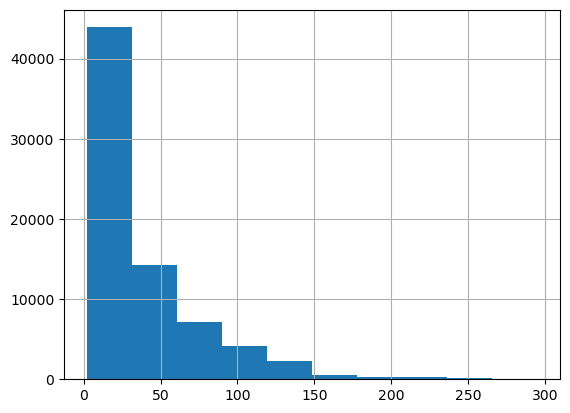

In [11]:
mind_interacts['impressions'].str.split().apply(len).hist()

In [17]:
len(mind_interacts)

73152

In [18]:
mind_interacts['impressions'].str.split().explode().str.strip("-0").str.strip("-1").isin(mind_news["news_id"]).sum()

903956

In [19]:
mind_interacts['user_id'].nunique()

50000

In [20]:
mind_interacts['history'] = mind_interacts['history'].str.split()

In [21]:
mind_interacts['impressions'] = mind_interacts['impressions'].str.split()

In [22]:
mind_interacts['impressions'].apply(lambda x: [y.split("-")[0] for y in x])

0        [N28682, N48740, N31958, N34130, N6916, N5472,...
1        [N20036, N23513, N32536, N46976, N35216, N3677...
2        [N36779, N62365, N58098, N5472, N13408, N55036...
3        [N6950, N60215, N6074, N11930, N6916, N24802, ...
4        [N5940, N23513, N49285, N23355, N19990, N31958...
                               ...                        
73147    [N496, N35159, N59856, N13270, N47213, N26485,...
73148    [N49285, N31958, N55237, N42844, N29862, N1999...
73149    [N7043, N512, N60215, N45057, N496, N37055, N1...
73150    [N23692, N19990, N20187, N5940, N13408, N31958...
73151    [N29862, N5472, N21679, N6400, N53572, N50775,...
Name: impressions, Length: 73152, dtype: object

In [23]:
mind_interacts['impressions'] .apply(lambda x: [y.split("-")[1] for y in x])

0        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1                                    [0, 1, 0, 0, 0, 0, 0]
2        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
3        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
4               [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
                               ...                        
73147    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
73148    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...
73149    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
73150    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
73151                    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Name: impressions, Length: 73152, dtype: object

In [24]:
mind_interacts['history'].explode().isin(mind_news['news_id'].unique())

0        False
0         True
0        False
0         True
0         True
         ...  
73151    False
73151    False
73151     True
73151     True
73151    False
Name: history, Length: 2364728, dtype: bool

In [25]:
#checks if belongs to news

In [26]:
mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(list)

index
0        [False, True, False, True, True, False, False,...
1        [True, False, True, True, True, True, False, T...
2        [False, True, False, True, False, False, True,...
3        [False, True, False, False, False, True, False...
4                       [False, False, False, False, True]
                               ...                        
73147    [False, False, True, False, True, False, True,...
73148    [False, False, False, False, False, False, Fal...
73149      [False, True, False, False, False, True, False]
73150    [False, False, False, False, False, False, Fal...
73151    [False, True, False, False, False, True, False...
Name: history, Length: 73152, dtype: object

In [27]:
mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum).sum()

/tmp/ipykernel_631454/3028116728.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum).sum()


881943

In [28]:
(mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum) >0).sum()

/tmp/ipykernel_631454/3688834197.py:1: FutureWarning: The provided callable <built-in function sum> is currently using np.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.sum instead.
  (mind_interacts['history'].explode().isin(mind_news['news_id'].unique()).reset_index().groupby('index')["history"].apply(sum) >0).sum()


65604

In [29]:
mind_interacts['history'].explode().loc[mind_interacts['history'].explode().isin(mind_news['news_id'].unique())].reset_index().groupby('index')["history"].apply(list)

index
0          [N46039, N53234, N11276, N6616, N63573, N38895]
1        [N58715, N51180, N33438, N54827, N28488, N3477...
2                                  [N1150, N16233, N53033]
3        [N49153, N58518, N7649, N45794, N53033, N29361...
4                                                 [N55556]
                               ...                        
73146    [N9897, N1569, N11641, N15542, N13304, N43265,...
73147    [N58434, N22185, N47020, N7884, N46259, N8024,...
73148                                             [N28257]
73149                                     [N42078, N46845]
73151    [N53568, N43123, N58235, N46826, N57181, N5006...
Name: history, Length: 65604, dtype: object

In [30]:

idxs_articles_of_the_type = mind_interacts['history'].explode().isin(mind_news['news_id'].unique())
mind_interacts['filtered_history'] = mind_interacts['history'].explode().loc[idxs_articles_of_the_type].reset_index().groupby('index')["history"].apply(list)

<Axes: >

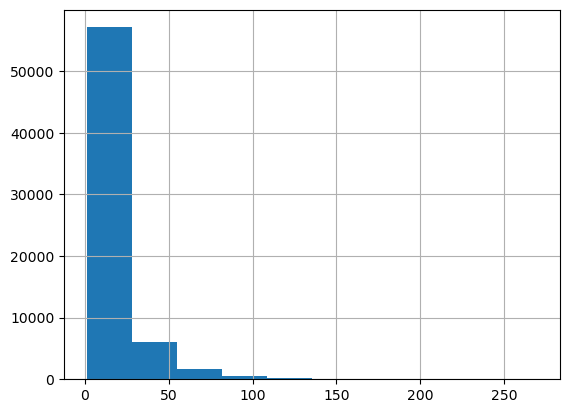

In [31]:
mind_interacts.dropna(axis=0,subset=['filtered_history'])['filtered_history'].apply(len).hist()

In [32]:
(mind_interacts.dropna(axis=0,subset=['filtered_history'])['filtered_history'].apply(len)>0).sum()

65604

In [33]:
mind_interacts.dropna(axis=0,subset=['filtered_history'],inplace=True)

In [34]:
train_mind = mind_interacts.explode('filtered_history').copy()

In [35]:
mind_news.head()

,news_id,news_type,news_subtype,title,text,url,labels1,labels2
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
6,N11429,news,newsscienceandtechnology,"How to record your screen on Windows, macOS, i...",The easiest way to record what's happening on ...,https://assets.msn.com/labs/mind/AADlomf.html,"[{""Label"": ""Microsoft Windows"", ""Type"": ""J"", ""...",[]
9,N59295,news,newsworld,Chile: Three die in supermarket fire amid prot...,Three people have died in a supermarket fire a...,https://assets.msn.com/labs/mind/AAJ43pw.html,"[{""Label"": ""Chile"", ""Type"": ""G"", ""WikidataId"":...","[{""Label"": ""Santiago"", ""Type"": ""G"", ""WikidataI..."
22,N9786,news,newspolitics,Elijah Cummings to lie in state at US Capitol ...,"Cummings, a Democrat whose district included s...",https://assets.msn.com/labs/mind/AAJgNxm.html,"[{""Label"": ""Elijah Cummings"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Elijah Cummings"", ""Type"": ""P"", ""Wi..."
27,N42474,news,newsbusiness,Trump's Trustbusters Bring Microsoft Lessons t...,DOJ's Makan Delrahim and the FTC's Joe Simons ...,https://assets.msn.com/labs/mind/AACI1SK.html,"[{""Label"": ""Big Four tech companies"", ""Type"": ...","[{""Label"": ""Makan Delrahim"", ""Type"": ""P"", ""Wik..."


In [36]:
train_mind = train_mind.merge(mind_news,left_on="filtered_history",right_on="news_id")

In [37]:
train_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N46039,N46039,news,newsus,Hard Rock Hotel New Orleans collapse: Former s...,Structural engineer Walter Zehner worked on th...,https://assets.msn.com/labs/mind/AAIMgrP.html,"[{""Label"": ""New Orleans"", ""Type"": ""G"", ""Wikida...","[{""Label"": ""Structural engineering"", ""Type"": ""..."
1,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N53234,N53234,news,newsus,Outer Banks storms unearth old shipwreck from ...,A recent storm on the Outer Banks unearthed an...,https://assets.msn.com/labs/mind/AAIS0cu.html,"[{""Label"": ""Outer Banks"", ""Type"": ""L"", ""Wikida...","[{""Label"": ""Outer Banks"", ""Type"": ""L"", ""Wikida..."
2,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N11276,N11276,finance,finance-companies,Tiffany's is selling a holiday advent calendar...,Each display contains 24 items including earri...,https://assets.msn.com/labs/mind/AAJedt6.html,[],[]
3,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N6616,N6616,news,newscrime,Felicity Huffman Smiles as She Begins Communit...,The 56-year-old actress was released from pris...,https://assets.msn.com/labs/mind/AAJPvxp.html,"[{""Label"": ""Felicity Huffman"", ""Type"": ""P"", ""W...",[]
4,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N63573,N63573,news,newsus,Hundreds of thousands of people in California ...,Hundreds of thousands of people live downriver...,https://assets.msn.com/labs/mind/AAJOfhR.html,"[{""Label"": ""California"", ""Type"": ""G"", ""Wikidat...","[{""Label"": ""United States Army Corps of Engine..."


In [38]:
mind_interacts['impression_news_id'] = mind_interacts['impressions'].apply(lambda x: [y.split("-")[0] for y in x])

In [39]:
mind_interacts['impression_news_label'] = mind_interacts['impressions'] .apply(lambda x: [y.split("-")[1] for y in x])

In [40]:
test_mind = mind_interacts.explode(['impression_news_id','impression_news_label']).copy()

In [41]:
test_mind = test_mind.loc[test_mind['impression_news_id'].isin(mind_news["news_id"].unique())]

In [42]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label
0,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...","[N46039, N53234, N11276, N6616, N63573, N38895]",N50775,0
0,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...","[N46039, N53234, N11276, N6616, N63573, N38895]",N24802,0
0,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...","[N46039, N53234, N11276, N6616, N63573, N38895]",N33176,0
1,2,U60458,11/15/2019 7:11:50 AM,"[N58715, N32109, N51180, N33438, N54827, N2848...","[N20036-0, N23513-1, N32536-0, N46976-0, N3521...","[N58715, N51180, N33438, N54827, N28488, N3477...",N36779,0
2,3,U44190,11/15/2019 9:55:12 AM,"[N56253, N1150, N55189, N16233, N61704, N51706...","[N36779-0, N62365-0, N58098-0, N5472-0, N13408...","[N1150, N16233, N53033]",N36779,0


In [43]:
test_mind = test_mind.merge(mind_news,left_on="impression_news_id",right_on="news_id")

In [44]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id,news_type,news_subtype,title,text,url,labels1,labels2
0,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...","[N46039, N53234, N11276, N6616, N63573, N38895]",N50775,0,N50775,news,newsworld,"U.S. Troops Will Die If They Remain in Syria, ...",President Donald Trump has said a force of Ame...,https://assets.msn.com/labs/mind/BBWOXuV.html,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid..."
1,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...","[N46039, N53234, N11276, N6616, N63573, N38895]",N24802,0,N24802,news,newsus,3 Indiana judges suspended after a night of dr...,Hours before they were to attend an educationa...,https://assets.msn.com/labs/mind/BBWOLij.html,"[{""Label"": ""White Castle (restaurant)"", ""Type""...","[{""Label"": ""Indianapolis"", ""Type"": ""G"", ""Wikid..."
2,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...","[N46039, N53234, N11276, N6616, N63573, N38895]",N33176,0,N33176,news,newsus,Surviving Santa Clarita school shooting victim...,What should have been a normal Thursday spiral...,https://assets.msn.com/labs/mind/BBWOMA5.html,"[{""Label"": ""Santa Clarita, California"", ""Type""...","[{""Label"": ""Saugus High School (California)"", ..."
3,2,U60458,11/15/2019 7:11:50 AM,"[N58715, N32109, N51180, N33438, N54827, N2848...","[N20036-0, N23513-1, N32536-0, N46976-0, N3521...","[N58715, N51180, N33438, N54827, N28488, N3477...",N36779,0,N36779,news,newsus,South Carolina teen gets life in prison for de...,"Jesse Osborne, the teenager responsible for a ...",https://assets.msn.com/labs/mind/BBWMe6C.html,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti..."
4,3,U44190,11/15/2019 9:55:12 AM,"[N56253, N1150, N55189, N16233, N61704, N51706...","[N36779-0, N62365-0, N58098-0, N5472-0, N13408...","[N1150, N16233, N53033]",N36779,0,N36779,news,newsus,South Carolina teen gets life in prison for de...,"Jesse Osborne, the teenager responsible for a ...",https://assets.msn.com/labs/mind/BBWMe6C.html,"[{""Label"": ""South Carolina"", ""Type"": ""G"", ""Wik...","[{""Label"": ""Townville Elementary School shooti..."


In [45]:
len(test_mind)

783571

In [46]:
test_mind = test_mind.explode(['filtered_history']).merge(mind_news,left_on="filtered_history",right_on="news_id")

In [47]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id_x,news_type_x,...,labels1_x,labels2_x,news_id_y,news_type_y,news_subtype_y,title_y,text_y,url_y,labels1_y,labels2_y
0,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N46039,N50775,0,N50775,news,...,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...",N46039,news,newsus,Hard Rock Hotel New Orleans collapse: Former s...,Structural engineer Walter Zehner worked on th...,https://assets.msn.com/labs/mind/AAIMgrP.html,"[{""Label"": ""New Orleans"", ""Type"": ""G"", ""Wikida...","[{""Label"": ""Structural engineering"", ""Type"": ""..."
1,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N53234,N50775,0,N50775,news,...,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...",N53234,news,newsus,Outer Banks storms unearth old shipwreck from ...,A recent storm on the Outer Banks unearthed an...,https://assets.msn.com/labs/mind/AAIS0cu.html,"[{""Label"": ""Outer Banks"", ""Type"": ""L"", ""Wikida...","[{""Label"": ""Outer Banks"", ""Type"": ""L"", ""Wikida..."
2,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N11276,N50775,0,N50775,news,...,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...",N11276,finance,finance-companies,Tiffany's is selling a holiday advent calendar...,Each display contains 24 items including earri...,https://assets.msn.com/labs/mind/AAJedt6.html,[],[]
3,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N6616,N50775,0,N50775,news,...,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...",N6616,news,newscrime,Felicity Huffman Smiles as She Begins Communit...,The 56-year-old actress was released from pris...,https://assets.msn.com/labs/mind/AAJPvxp.html,"[{""Label"": ""Felicity Huffman"", ""Type"": ""P"", ""W...",[]
4,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N63573,N50775,0,N50775,news,...,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...",N63573,news,newsus,Hundreds of thousands of people in California ...,Hundreds of thousands of people live downriver...,https://assets.msn.com/labs/mind/AAJOfhR.html,"[{""Label"": ""California"", ""Type"": ""G"", ""Wikidat...","[{""Label"": ""United States Army Corps of Engine..."


In [48]:
test_mind.columns

Index(['impression_id', 'user_id', 'time', 'history', 'impressions',
       'filtered_history', 'impression_news_id', 'impression_news_label',
       'news_id_x', 'news_type_x', 'news_subtype_x', 'title_x', 'text_x',
       'url_x', 'labels1_x', 'labels2_x', 'news_id_y', 'news_type_y',
       'news_subtype_y', 'title_y', 'text_y', 'url_y', 'labels1_y',
       'labels2_y'],
      dtype='object')

In [49]:
#res = test_mind.groupby(['impression_id','user_id','time','news_id_x'])[['text_x','title_x','text_y','title_y','news_type_x','impression_news_label']].aggregate(list)

In [50]:
res = test_mind.groupby(['impression_id','user_id','time','news_id_x'])[['text_x','title_x','text_y','title_y','news_type_x','impression_news_label']].aggregate(list)

In [51]:
res.head()

text_x  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [Hours before they were to attend an education...   
                                             N33176     [What should have been a normal Thursday spira...   
                                             N50775     [President Donald Trump has said a force of Am...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [Jesse Osborne, the teenager responsible for a...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [One of the signature initiatives of Elizabeth...   

                                                                                                  title_x  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [3 Indiana judges suspended after a night of d...   
                                             N33176     [Surviving Santa Clarita school shooting victi...   
                                             N50775     [U.S. Troops Will Die If They Remain in Syria,...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [South Carolina teen gets life in prison for d...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [Raise Billions From Billionaires? Tax Experts...   

                                                                                                   text_y  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [Structural engineer Walter Zehner worked on t...   
                                             N33176     [Structural engineer Walter Zehner worked on t...   
                                             N50775     [Structural engineer Walter Zehner worked on t...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [Witnesses said the confrontation began on Sat...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [A Dallas mother made her son go through unnec...   

                                                                                                  title_y  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [Hard Rock Hotel New Orleans collapse: Former ...   
                                             N33176     [Hard Rock Hotel New Orleans collapse: Former ...   
                                             N50775     [Hard Rock Hotel New Orleans collapse: Former ...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [Officer placed on leave after threatening tee...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [A Texas mom is going to prison after putting ...   

                                                                                             news_type_x  \
impression_id user_id time                   news_id_x                                                     
1             U80234  11/15/2019 12:37:50 PM N24802                 [news, news, news, news, news, news]   
                                             N33176                 [news, news, news, news, news, news]   
                                             N50775                 [news, news, news, news, news, news]   
2             U60458  11/15/2019 7:11:50 AM  N36779     [news, news, news, news, news, news, news, news]   
3             U44190  11/15/2019 9:55:12 AM  N13408                          [finance, finance, finance]   

                                                           impression_news_label  
impression_id user_id time                   news_id_x                            
1             U80234  11/15/2019 12:37:50 PM N24802           [0, 0, 0, 0, 0, 0]  
                                     

In [52]:
len(set(res['text_x'].iloc[0]))

1

In [53]:
len(res['text_x'].iloc[0])

6

In [54]:
len(set(res['text_x'].iloc[0]))

1

In [55]:
len(res['text_x'].iloc[0])

6

In [56]:
res.head()

text_x  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [Hours before they were to attend an education...   
                                             N33176     [What should have been a normal Thursday spira...   
                                             N50775     [President Donald Trump has said a force of Am...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [Jesse Osborne, the teenager responsible for a...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [One of the signature initiatives of Elizabeth...   

                                                                                                  title_x  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [3 Indiana judges suspended after a night of d...   
                                             N33176     [Surviving Santa Clarita school shooting victi...   
                                             N50775     [U.S. Troops Will Die If They Remain in Syria,...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [South Carolina teen gets life in prison for d...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [Raise Billions From Billionaires? Tax Experts...   

                                                                                                   text_y  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [Structural engineer Walter Zehner worked on t...   
                                             N33176     [Structural engineer Walter Zehner worked on t...   
                                             N50775     [Structural engineer Walter Zehner worked on t...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [Witnesses said the confrontation began on Sat...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [A Dallas mother made her son go through unnec...   

                                                                                                  title_y  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [Hard Rock Hotel New Orleans collapse: Former ...   
                                             N33176     [Hard Rock Hotel New Orleans collapse: Former ...   
                                             N50775     [Hard Rock Hotel New Orleans collapse: Former ...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [Officer placed on leave after threatening tee...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [A Texas mom is going to prison after putting ...   

                                                                                             news_type_x  \
impression_id user_id time                   news_id_x                                                     
1             U80234  11/15/2019 12:37:50 PM N24802                 [news, news, news, news, news, news]   
                                             N33176                 [news, news, news, news, news, news]   
                                             N50775                 [news, news, news, news, news, news]   
2             U60458  11/15/2019 7:11:50 AM  N36779     [news, news, news, news, news, news, news, news]   
3             U44190  11/15/2019 9:55:12 AM  N13408                          [finance, finance, finance]   

                                                           impression_news_label  
impression_id user_id time                   news_id_x                            
1             U80234  11/15/2019 12:37:50 PM N24802           [0, 0, 0, 0, 0, 0]  
                                     

In [57]:
res['text_x'] = res['text_x'].apply(lambda x: set(x).pop())
res['title_x'] = res['title_x'].apply(lambda x: set(x).pop())
res['impression_news_label'] = res['impression_news_label'].apply(lambda x: set(x).pop())
res['news_type_x'] = res['news_type_x'].apply(lambda x: set(x))

In [58]:
res.head()

text_x  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     Hours before they were to attend an educationa...   
                                             N33176     What should have been a normal Thursday spiral...   
                                             N50775     President Donald Trump has said a force of Ame...   
2             U60458  11/15/2019 7:11:50 AM  N36779     Jesse Osborne, the teenager responsible for a ...   
3             U44190  11/15/2019 9:55:12 AM  N13408     One of the signature initiatives of Elizabeth ...   

                                                                                                  title_x  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     3 Indiana judges suspended after a night of dr...   
                                             N33176     Surviving Santa Clarita school shooting victim...   
                                             N50775     U.S. Troops Will Die If They Remain in Syria, ...   
2             U60458  11/15/2019 7:11:50 AM  N36779     South Carolina teen gets life in prison for de...   
3             U44190  11/15/2019 9:55:12 AM  N13408     Raise Billions From Billionaires? Tax Experts ...   

                                                                                                   text_y  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [Structural engineer Walter Zehner worked on t...   
                                             N33176     [Structural engineer Walter Zehner worked on t...   
                                             N50775     [Structural engineer Walter Zehner worked on t...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [Witnesses said the confrontation began on Sat...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [A Dallas mother made her son go through unnec...   

                                                                                                  title_y  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [Hard Rock Hotel New Orleans collapse: Former ...   
                                             N33176     [Hard Rock Hotel New Orleans collapse: Former ...   
                                             N50775     [Hard Rock Hotel New Orleans collapse: Former ...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [Officer placed on leave after threatening tee...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [A Texas mom is going to prison after putting ...   

                                                       news_type_x  \
impression_id user_id time                   news_id_x               
1             U80234  11/15/2019 12:37:50 PM N24802         {news}   
                                             N33176         {news}   
                                             N50775         {news}   
2             U60458  11/15/2019 7:11:50 AM  N36779         {news}   
3             U44190  11/15/2019 9:55:12 AM  N13408      {finance}   

                                                       impression_news_label  
impression_id user_id time                   news_id_x                        
1             U80234  11/15/2019 12:37:50 PM N24802                        0  
                                             N33176                        0  
                                             N50775                        0  
2             U60458  11/15/2019 7:11:50 AM  N36779                        0  
3             U44190  11/15/2019 9:55:12 AM  N13408                        0

In [59]:
res = res.rename({'text_x':'text_candidate','title_x':'title_candidate','text_y':'text_history','title_y':'title_history','news_type_x':'candidate_news_type'},axis=1)

In [60]:
res.to_pickle('data/mind_val_preprocessed_history_and_candidate_v1.pkl')

In [61]:
res.head()

text_candidate  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     Hours before they were to attend an educationa...   
                                             N33176     What should have been a normal Thursday spiral...   
                                             N50775     President Donald Trump has said a force of Ame...   
2             U60458  11/15/2019 7:11:50 AM  N36779     Jesse Osborne, the teenager responsible for a ...   
3             U44190  11/15/2019 9:55:12 AM  N13408     One of the signature initiatives of Elizabeth ...   

                                                                                          title_candidate  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     3 Indiana judges suspended after a night of dr...   
                                             N33176     Surviving Santa Clarita school shooting victim...   
                                             N50775     U.S. Troops Will Die If They Remain in Syria, ...   
2             U60458  11/15/2019 7:11:50 AM  N36779     South Carolina teen gets life in prison for de...   
3             U44190  11/15/2019 9:55:12 AM  N13408     Raise Billions From Billionaires? Tax Experts ...   

                                                                                             text_history  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [Structural engineer Walter Zehner worked on t...   
                                             N33176     [Structural engineer Walter Zehner worked on t...   
                                             N50775     [Structural engineer Walter Zehner worked on t...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [Witnesses said the confrontation began on Sat...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [A Dallas mother made her son go through unnec...   

                                                                                            title_history  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802     [Hard Rock Hotel New Orleans collapse: Former ...   
                                             N33176     [Hard Rock Hotel New Orleans collapse: Former ...   
                                             N50775     [Hard Rock Hotel New Orleans collapse: Former ...   
2             U60458  11/15/2019 7:11:50 AM  N36779     [Officer placed on leave after threatening tee...   
3             U44190  11/15/2019 9:55:12 AM  N13408     [A Texas mom is going to prison after putting ...   

                                                       candidate_news_type  \
impression_id user_id time                   news_id_x                       
1             U80234  11/15/2019 12:37:50 PM N24802                 {news}   
                                             N33176                 {news}   
                                             N50775                 {news}   
2             U60458  11/15/2019 7:11:50 AM  N36779                 {news}   
3             U44190  11/15/2019 9:55:12 AM  N13408              {finance}   

                                                       impression_news_label  
impression_id user_id time                   news_id_x                        
1             U80234  11/15/2019 12:37:50 PM N24802                        0  
                                             N33176                        0  
                                             N50775                        0  
2             U60458  11/15/2019 7:11:50 AM  N36779                        0  
3             

In [62]:
1

1

In [63]:
test_mind.head()

,impression_id,user_id,time,history,impressions,filtered_history,impression_news_id,impression_news_label,news_id_x,news_type_x,...,labels1_x,labels2_x,news_id_y,news_type_y,news_subtype_y,title_y,text_y,url_y,labels1_y,labels2_y
0,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N46039,N50775,0,N50775,news,...,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...",N46039,news,newsus,Hard Rock Hotel New Orleans collapse: Former s...,Structural engineer Walter Zehner worked on th...,https://assets.msn.com/labs/mind/AAIMgrP.html,"[{""Label"": ""New Orleans"", ""Type"": ""G"", ""Wikida...","[{""Label"": ""Structural engineering"", ""Type"": ""..."
1,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N53234,N50775,0,N50775,news,...,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...",N53234,news,newsus,Outer Banks storms unearth old shipwreck from ...,A recent storm on the Outer Banks unearthed an...,https://assets.msn.com/labs/mind/AAIS0cu.html,"[{""Label"": ""Outer Banks"", ""Type"": ""L"", ""Wikida...","[{""Label"": ""Outer Banks"", ""Type"": ""L"", ""Wikida..."
2,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N11276,N50775,0,N50775,news,...,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...",N11276,finance,finance-companies,Tiffany's is selling a holiday advent calendar...,Each display contains 24 items including earri...,https://assets.msn.com/labs/mind/AAJedt6.html,[],[]
3,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N6616,N50775,0,N50775,news,...,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...",N6616,news,newscrime,Felicity Huffman Smiles as She Begins Communit...,The 56-year-old actress was released from pris...,https://assets.msn.com/labs/mind/AAJPvxp.html,"[{""Label"": ""Felicity Huffman"", ""Type"": ""P"", ""W...",[]
4,1,U80234,11/15/2019 12:37:50 PM,"[N55189, N46039, N51741, N53234, N11276, N264,...","[N28682-0, N48740-0, N31958-1, N34130-0, N6916...",N63573,N50775,0,N50775,news,...,"[{""Label"": ""Bashar al-Assad"", ""Type"": ""P"", ""Wi...","[{""Label"": ""Donald Trump"", ""Type"": ""P"", ""Wikid...",N63573,news,newsus,Hundreds of thousands of people in California ...,Hundreds of thousands of people live downriver...,https://assets.msn.com/labs/mind/AAJOfhR.html,"[{""Label"": ""California"", ""Type"": ""G"", ""Wikidat...","[{""Label"": ""United States Army Corps of Engine..."


In [64]:
test_mind.columns

Index(['impression_id', 'user_id', 'time', 'history', 'impressions',
       'filtered_history', 'impression_news_id', 'impression_news_label',
       'news_id_x', 'news_type_x', 'news_subtype_x', 'title_x', 'text_x',
       'url_x', 'labels1_x', 'labels2_x', 'news_id_y', 'news_type_y',
       'news_subtype_y', 'title_y', 'text_y', 'url_y', 'labels1_y',
       'labels2_y'],
      dtype='object')

In [65]:
res2 = test_mind.groupby(['impression_id','user_id','time','news_id_x'])[['news_id_y','impression_news_id','impression_news_label']].aggregate(list)

In [66]:
res2.head()

news_id_y  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802       [N46039, N53234, N11276, N6616, N63573, N38895]   
                                             N33176       [N46039, N53234, N11276, N6616, N63573, N38895]   
                                             N50775       [N46039, N53234, N11276, N6616, N63573, N38895]   
2             U60458  11/15/2019 7:11:50 AM  N36779     [N58715, N51180, N33438, N54827, N28488, N3477...   
3             U44190  11/15/2019 9:55:12 AM  N13408                               [N1150, N16233, N53033]   

                                                                                       impression_news_id  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802      [N24802, N24802, N24802, N24802, N24802, N24802]   
                                             N33176      [N33176, N33176, N33176, N33176, N33176, N33176]   
                                             N50775      [N50775, N50775, N50775, N50775, N50775, N50775]   
2             U60458  11/15/2019 7:11:50 AM  N36779     [N36779, N36779, N36779, N36779, N36779, N3677...   
3             U44190  11/15/2019 9:55:12 AM  N13408                              [N13408, N13408, N13408]   

                                                           impression_news_label  
impression_id user_id time                   news_id_x                            
1             U80234  11/15/2019 12:37:50 PM N24802           [0, 0, 0, 0, 0, 0]  
                                             N33176           [0, 0, 0, 0, 0, 0]  
                                             N50775           [0, 0, 0, 0, 0, 0]  
2             U60458  11/15/2019 7:11:50 AM  N36779     [0, 0, 0, 0, 0, 0, 0, 0]  
3             U44190  11/15/2019 9:55:12 AM  N13408                    [0, 0, 0]

In [67]:
res2.head()

news_id_y  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802       [N46039, N53234, N11276, N6616, N63573, N38895]   
                                             N33176       [N46039, N53234, N11276, N6616, N63573, N38895]   
                                             N50775       [N46039, N53234, N11276, N6616, N63573, N38895]   
2             U60458  11/15/2019 7:11:50 AM  N36779     [N58715, N51180, N33438, N54827, N28488, N3477...   
3             U44190  11/15/2019 9:55:12 AM  N13408                               [N1150, N16233, N53033]   

                                                                                       impression_news_id  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802      [N24802, N24802, N24802, N24802, N24802, N24802]   
                                             N33176      [N33176, N33176, N33176, N33176, N33176, N33176]   
                                             N50775      [N50775, N50775, N50775, N50775, N50775, N50775]   
2             U60458  11/15/2019 7:11:50 AM  N36779     [N36779, N36779, N36779, N36779, N36779, N3677...   
3             U44190  11/15/2019 9:55:12 AM  N13408                              [N13408, N13408, N13408]   

                                                           impression_news_label  
impression_id user_id time                   news_id_x                            
1             U80234  11/15/2019 12:37:50 PM N24802           [0, 0, 0, 0, 0, 0]  
                                             N33176           [0, 0, 0, 0, 0, 0]  
                                             N50775           [0, 0, 0, 0, 0, 0]  
2             U60458  11/15/2019 7:11:50 AM  N36779     [0, 0, 0, 0, 0, 0, 0, 0]  
3             U44190  11/15/2019 9:55:12 AM  N13408                    [0, 0, 0]

In [68]:
res2['history'] = res2['news_id_y']
#res2['text_x'] = res2['text_x'].apply(lambda x: set(x).pop())
res2['impression_news_id'] = res2['impression_news_id'].apply(lambda x: set(x).pop())
res2['impression_news_label'] = res2['impression_news_label'].apply(lambda x: set(x).pop())


In [69]:
res2.head()

news_id_y  \
impression_id user_id time                   news_id_x                                                      
1             U80234  11/15/2019 12:37:50 PM N24802       [N46039, N53234, N11276, N6616, N63573, N38895]   
                                             N33176       [N46039, N53234, N11276, N6616, N63573, N38895]   
                                             N50775       [N46039, N53234, N11276, N6616, N63573, N38895]   
2             U60458  11/15/2019 7:11:50 AM  N36779     [N58715, N51180, N33438, N54827, N28488, N3477...   
3             U44190  11/15/2019 9:55:12 AM  N13408                               [N1150, N16233, N53033]   

                                                       impression_news_id  \
impression_id user_id time                   news_id_x                      
1             U80234  11/15/2019 12:37:50 PM N24802                N24802   
                                             N33176                N33176   
                                             N50775                N50775   
2             U60458  11/15/2019 7:11:50 AM  N36779                N36779   
3             U44190  11/15/2019 9:55:12 AM  N13408                N13408   

                                                       impression_news_label  \
impression_id user_id time                   news_id_x                         
1             U80234  11/15/2019 12:37:50 PM N24802                        0   
                                             N33176                        0   
                                             N50775                        0   
2             U60458  11/15/2019 7:11:50 AM  N36779                        0   
3             U44190  11/15/2019 9:55:12 AM  N13408                        0   

                                                                                                  history  
impression_id user_id time                   news_id_x                                                     
1             U80234  11/15/2019 12:37:50 PM N24802       [N46039, N53234, N11276, N6616, N63573, N38895]  
                                             N33176       [N46039, N53234, N11276, N6616, N63573, N38895]  
                                             N50775       [N46039, N53234, N11276, N6616, N63573, N38895]  
2             U60458  11/15/2019 7:11:50 AM  N36779     [N58715, N51180, N33438, N54827, N28488, N3477...  
3             U44190  11/15/2019 9:55:12 AM  N13408                               [N1150, N16233, N53033]

In [70]:
res2["impression"] = res2["impression_news_id"].astype(str)+"-"+res2["impression_news_label"].astype(str)

In [71]:
res3 = res2.groupby(['impression_id','user_id','time'])[['history','impression']].aggregate(list)

In [72]:
res3.head()

,,,history,impression
impression_id,user_id,time,,
1,U80234,11/15/2019 12:37:50 PM,"[[N46039, N53234, N11276, N6616, N63573, N3889...","[N24802-0, N33176-0, N50775-0]"
2,U60458,11/15/2019 7:11:50 AM,"[[N58715, N51180, N33438, N54827, N28488, N347...",[N36779-0]
3,U44190,11/15/2019 9:55:12 AM,"[[N1150, N16233, N53033], [N1150, N16233, N530...","[N13408-0, N16680-0, N36779-0, N50775-0, N5328..."
4,U87380,11/15/2019 3:12:46 PM,"[[N49153, N58518, N7649, N45794, N53033, N2936...","[N21941-0, N24802-0, N29091-0, N45057-0, N4733..."
5,U9444,11/15/2019 8:25:46 AM,"[[N55556], [N55556]]","[N29393-0, N36779-0]"


In [73]:
res3['impressions'] =res3['impression'].apply(lambda x: " ".join(x))

In [74]:
res3.head()

,,,history,impression,impressions
impression_id,user_id,time,,,
1,U80234,11/15/2019 12:37:50 PM,"[[N46039, N53234, N11276, N6616, N63573, N3889...","[N24802-0, N33176-0, N50775-0]",N24802-0 N33176-0 N50775-0
2,U60458,11/15/2019 7:11:50 AM,"[[N58715, N51180, N33438, N54827, N28488, N347...",[N36779-0],N36779-0
3,U44190,11/15/2019 9:55:12 AM,"[[N1150, N16233, N53033], [N1150, N16233, N530...","[N13408-0, N16680-0, N36779-0, N50775-0, N5328...",N13408-0 N16680-0 N36779-0 N50775-0 N53283-0 N...
4,U87380,11/15/2019 3:12:46 PM,"[[N49153, N58518, N7649, N45794, N53033, N2936...","[N21941-0, N24802-0, N29091-0, N45057-0, N4733...",N21941-0 N24802-0 N29091-0 N45057-0 N4733-0 N5...
5,U9444,11/15/2019 8:25:46 AM,"[[N55556], [N55556]]","[N29393-0, N36779-0]",N29393-0 N36779-0


In [75]:
res3['history'] = res3['history'].apply(lambda x: x[0])

In [76]:
res3['history'] = res3['history'].apply(lambda x: " ".join(x))

In [77]:
res3.head()

,,,history,impression,impressions
impression_id,user_id,time,,,
1,U80234,11/15/2019 12:37:50 PM,N46039 N53234 N11276 N6616 N63573 N38895,"[N24802-0, N33176-0, N50775-0]",N24802-0 N33176-0 N50775-0
2,U60458,11/15/2019 7:11:50 AM,N58715 N51180 N33438 N54827 N28488 N34775 N337...,[N36779-0],N36779-0
3,U44190,11/15/2019 9:55:12 AM,N1150 N16233 N53033,"[N13408-0, N16680-0, N36779-0, N50775-0, N5328...",N13408-0 N16680-0 N36779-0 N50775-0 N53283-0 N...
4,U87380,11/15/2019 3:12:46 PM,N49153 N58518 N7649 N45794 N53033 N29361 N28247,"[N21941-0, N24802-0, N29091-0, N45057-0, N4733...",N21941-0 N24802-0 N29091-0 N45057-0 N4733-0 N5...
5,U9444,11/15/2019 8:25:46 AM,N55556,"[N29393-0, N36779-0]",N29393-0 N36779-0


In [78]:
res3.columns

Index(['history', 'impression', 'impressions'], dtype='object')

In [79]:
res3.reset_index()[['impression_id','user_id','time','history', 'impressions']].to_csv('data/trial',sep='\t',index=False,header=False)

In [80]:
trial = pd.read_table('data/trial')

In [81]:
trial.head()

,1,U80234,11/15/2019 12:37:50 PM,N46039 N53234 N11276 N6616 N63573 N38895,N24802-0 N33176-0 N50775-0
0,2,U60458,11/15/2019 7:11:50 AM,N58715 N51180 N33438 N54827 N28488 N34775 N337...,N36779-0
1,3,U44190,11/15/2019 9:55:12 AM,N1150 N16233 N53033,N13408-0 N16680-0 N36779-0 N50775-0 N53283-0 N...
2,4,U87380,11/15/2019 3:12:46 PM,N49153 N58518 N7649 N45794 N53033 N29361 N28247,N21941-0 N24802-0 N29091-0 N45057-0 N4733-0 N5...
3,5,U9444,11/15/2019 8:25:46 AM,N55556,N29393-0 N36779-0
4,6,U69606,11/15/2019 1:24:44 PM,N19591 N53033 N54088 N34140 N37394,N11390-0 N24802-1 N29091-0


In [82]:
res3.reset_index()[['impression_id','user_id','time','history', 'impressions']].to_csv('data/small_filtered_behaviors_dev.tsv',sep='\t',index=False,header=False)

In [83]:
#pd.read_table('data/MINDsmall_dev/behaviors.tsv',header=None,names=["impression_id","user_id","time","history","impressions"])

In [84]:
1

1

In [85]:
mind_interacts['im']

KeyError: 'im'

In [69]:
bhv_tr = pd.read_table('data/small_filtered_behaviors_train.tsv',names=['impression_id','user_id','time','history', 'impressions'])

In [70]:
bhv_tr

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
2,3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,N27581-0 N35729-0
4,6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,N21119-1 N25722-0 N2869-0 N33619-1 N53696-0
...,...,...,...,...,...
138597,156961,U21593,11/14/2019 10:24:05 PM,N58559 N1954 N43353 N14343 N13008 N44495 N996 ...,N12446-0 N22975-0 N37458-0 N42515-0 N46917-0 N...
138598,156962,U10123,11/13/2019 6:57:04 AM,N9803 N57318 N54842 N63779 N35710 N11037 N2980...,N13105-0 N13540-0 N13907-0 N15812-0 N16291-0 N...
138599,156963,U75630,11/14/2019 10:58:13 AM,N59704 N9803 N812 N41375 N12844 N53880 N16710 ...,N25165-0 N34668-0 N34869-0 N36226-0 N38779-0 N...
138600,156964,U44625,11/13/2019 2:57:02 PM,N3164 N43295 N53854 N44649 N26398 N43983 N1651...,N12656-0 N12848-0 N14184-0 N15262-0 N166-0 N17...


In [71]:
bhv_u_tr = pd.read_table('UniTRec/textRec_datasets/newsRec/MIND-small/train/behaviors.tsv',names=['impression_id','user_id','time','history', 'impressions'])

In [72]:
bhv_tr.loc[bhv_tr["impression_id"].isin(bhv_u_tr["impression_id"])].to_csv('UniTRec/textRec_datasets/newsRec/MIND-small/train/behaviors.tsv',sep='\t',index=False,header=False)

In [73]:
bhv_tr = pd.read_table('data/small_filtered_behaviors_train.tsv',names=['impression_id','user_id','time','history', 'impressions'])

In [74]:
bhv_tr

,impression_id,user_id,time,history,impressions
0,1,U13740,11/11/2019 9:05:58 AM,N45794 N19347 N31801,N35729-0
1,2,U91836,11/12/2019 6:11:30 PM,N31739 N6072 N63045 N23979 N43353 N8129 N1569 ...,N17059-1 N20495-0 N22407-0 N39317-0 N42977-0
2,3,U73700,11/14/2019 7:01:48 AM,N7563 N47289 N24233,N12330-0 N23877-0 N29739-0 N35389-0 N36226-0 N...
3,4,U34670,11/11/2019 5:28:05 AM,N53880 N41375,N27581-0 N35729-0
4,6,U19739,11/11/2019 6:52:13 PM,N14343 N32607 N32320 N22007 N24294 N8275 N6695...,N21119-1 N25722-0 N2869-0 N33619-1 N53696-0
...,...,...,...,...,...
138597,156961,U21593,11/14/2019 10:24:05 PM,N58559 N1954 N43353 N14343 N13008 N44495 N996 ...,N12446-0 N22975-0 N37458-0 N42515-0 N46917-0 N...
138598,156962,U10123,11/13/2019 6:57:04 AM,N9803 N57318 N54842 N63779 N35710 N11037 N2980...,N13105-0 N13540-0 N13907-0 N15812-0 N16291-0 N...
138599,156963,U75630,11/14/2019 10:58:13 AM,N59704 N9803 N812 N41375 N12844 N53880 N16710 ...,N25165-0 N34668-0 N34869-0 N36226-0 N38779-0 N...
138600,156964,U44625,11/13/2019 2:57:02 PM,N3164 N43295 N53854 N44649 N26398 N43983 N1651...,N12656-0 N12848-0 N14184-0 N15262-0 N166-0 N17...


In [75]:
bhv_u_tr = pd.read_table('UniTRec/textRec_datasets/newsRec/MIND-small/train+dev/behaviors.tsv',names=['impression_id','user_id','time','history', 'impressions'])

In [76]:
bhv_tr.loc[bhv_tr["impression_id"].isin(bhv_u_tr["impression_id"])].to_csv('UniTRec/textRec_datasets/newsRec/MIND-small/train+dev/behaviors.tsv',sep='\t',index=False,header=False)